In [12]:
#importing dataser
import pandas as pd

# Load your uploaded file
df = pd.read_csv("heart.csv")



In [13]:
# Preview the first few rows
print(df.head())
df.info()
df.shape

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

(918, 12)

In [14]:
#checking the null values
# Null values in each column
print( df.isnull().sum())

# Unique values in each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Age: 50
Sex: 2
ChestPainType: 4
RestingBP: 67
Cholesterol: 222
FastingBS: 2
RestingECG: 3
MaxHR: 119
ExerciseAngina: 2
Oldpeak: 53
ST_Slope: 3
HeartDisease: 2


In [15]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


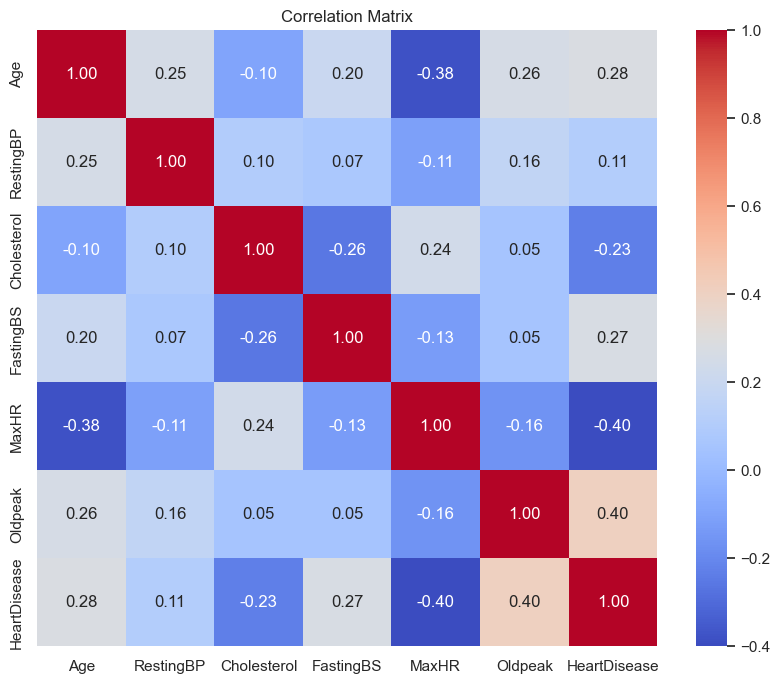

In [20]:
#EDA and correlation matrix 
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Calculate correlation matrix
corr = df.select_dtypes(include=['number']).corr()


# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
#Oldpeak increases → heart disease risk increases.
#MaxHR (maximum heart rate) decreases → heart disease risk increases.



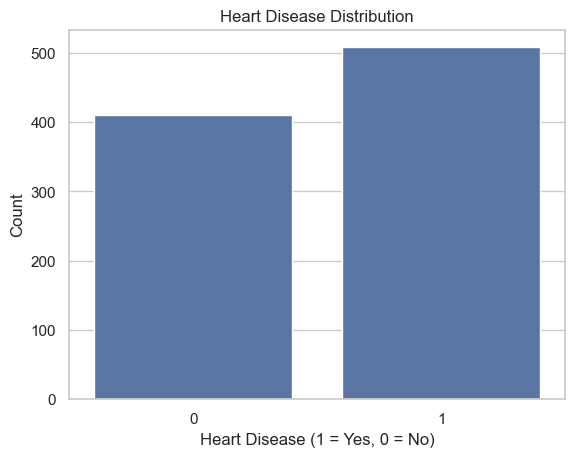

In [21]:
sns.countplot(x="HeartDisease", data=df)
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


In [22]:
#data is balanced

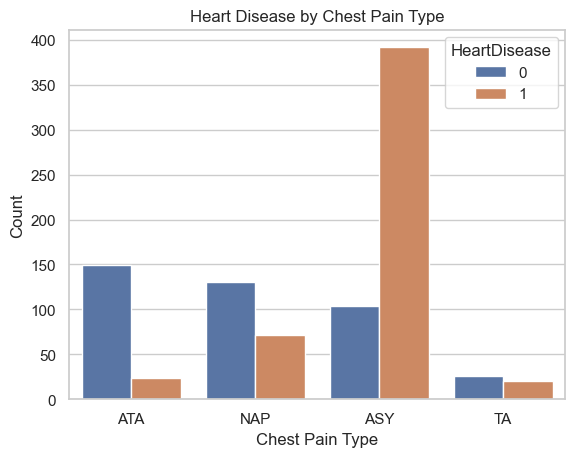

In [23]:
sns.countplot(x="ChestPainType", hue="HeartDisease", data=df)
plt.title("Heart Disease by Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()


In [ ]:
# ASY has Very strong association with Heart Disease

In [24]:
# ecoding categorial features
df.dtypes


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [51]:
df_encoded = pd.get_dummies(
    df,
    columns=['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
    drop_first=True
)
df_encoded["Sex"] = df["Sex"].map({'M': 1, 'F': 0})

In [52]:
df_encoded

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,NaN,140,289,0,172,0.0,0,True,False,False,True,False,False,False,True
1,49,NaN,160,180,0,156,1.0,1,False,True,False,True,False,False,True,False
2,37,NaN,130,283,0,98,0.0,0,True,False,False,False,True,False,False,True
3,48,NaN,138,214,0,108,1.5,1,False,False,False,True,False,True,True,False
4,54,NaN,150,195,0,122,0.0,0,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,NaN,110,264,0,132,1.2,1,False,False,True,True,False,False,True,False
914,68,NaN,144,193,1,141,3.4,1,False,False,False,True,False,False,True,False
915,57,NaN,130,131,0,115,1.2,1,False,False,False,True,False,True,True,False
916,57,NaN,130,236,0,174,0.0,1,True,False,False,False,False,False,True,False


In [53]:
# TRAIN TEST SPLT
from sklearn.model_selection import train_test_split


# X = features, y = target
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [54]:
#training descision tree classifier 
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [55]:
# predicting and evaluating accuracy on both training as well as testing dataset 
from sklearn.metrics import accuracy_score

# Predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy :", test_acc)



Train Accuracy: 1.0
Test Accuracy : 0.7445652173913043


In [ ]:
# 	Model memorizing more than generalizing


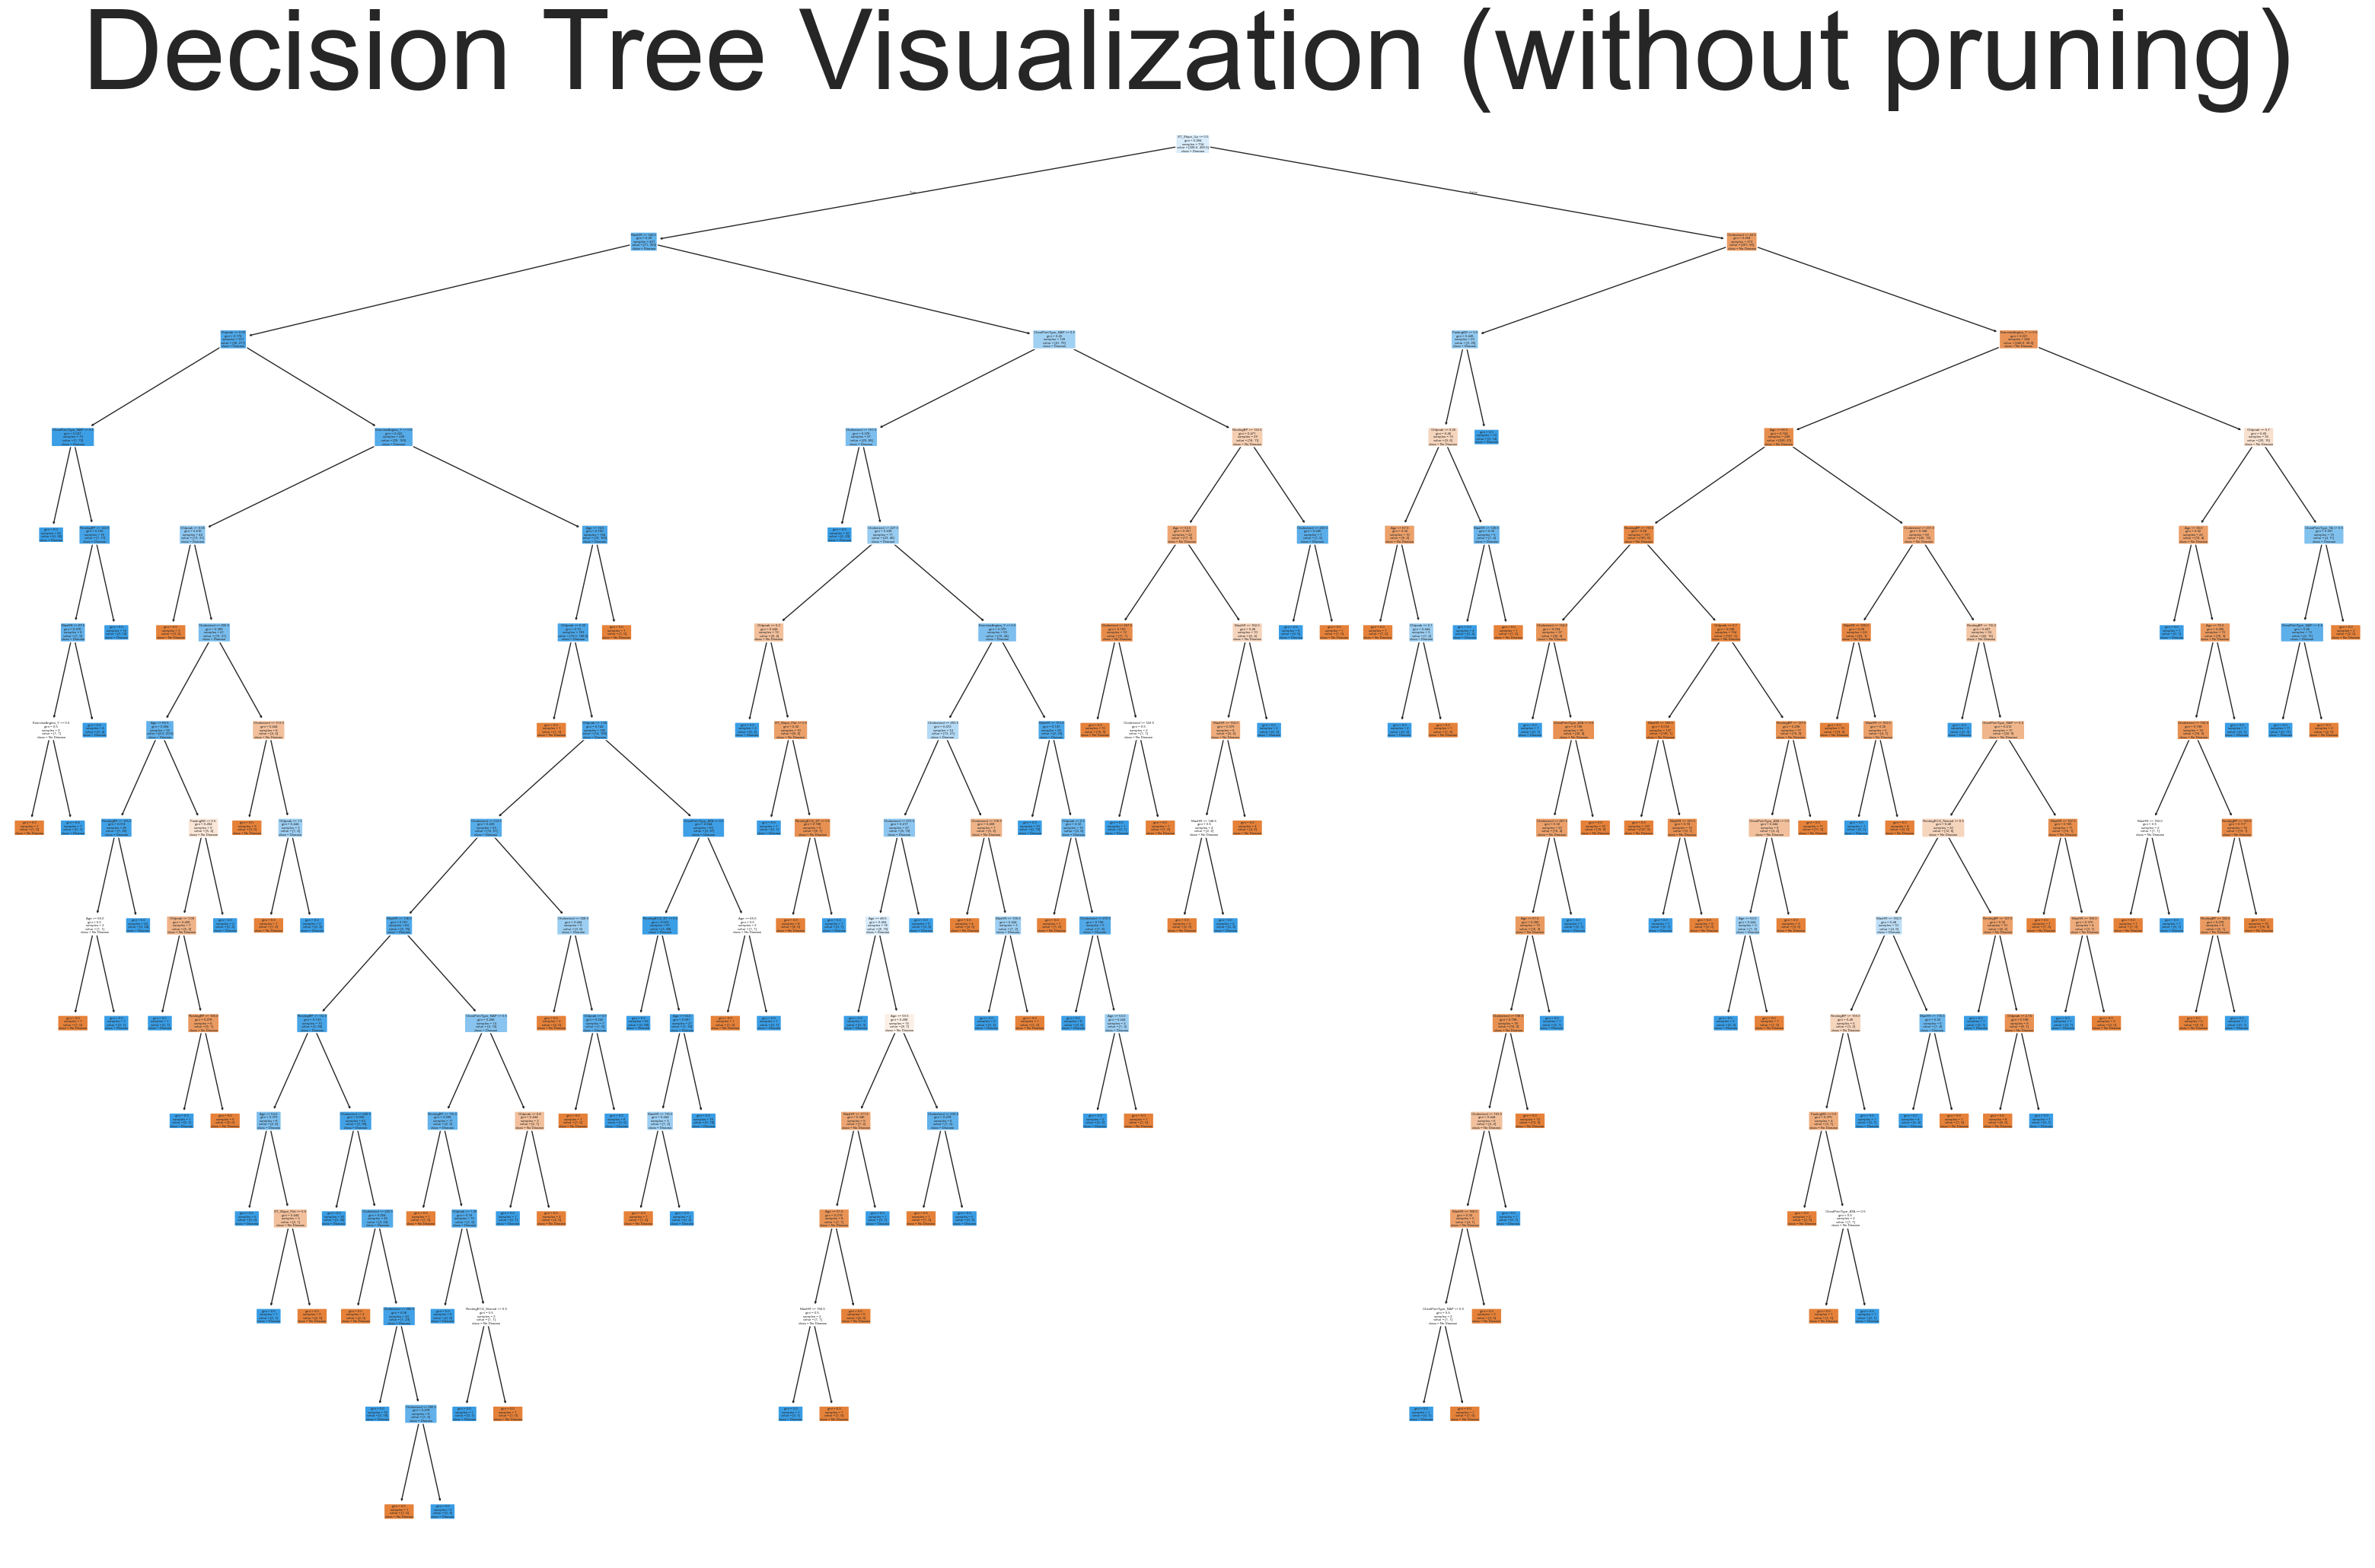

In [69]:
# Visualising the Decision Tree 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 25))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"], rounded=True)
plt.title("Decision Tree Visualization (without pruning)", fontsize=106)
plt.show()


In [70]:
#Pre-Pruning to Prevent Overfitting
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Initialize the classifier
dt = DecisionTreeClassifier(random_state=42)

# GridSearch cv
grid = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best estimator
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best CV Score: 0.8419066256639642


In [73]:
from sklearn.metrics import classification_report

# Predict on test set using best model
y_pred = grid.predict(X_test)

# Accuracy
print("Test Accuracy (Tuned):", accuracy_score(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))


Test Accuracy (Tuned): 0.8152173913043478
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        82
           1       0.85      0.80      0.83       102

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.82      0.82      0.82       184



In [ ]:
#evaluating on test data
#educed Train Accuracy (good) and improved Test Accuracy

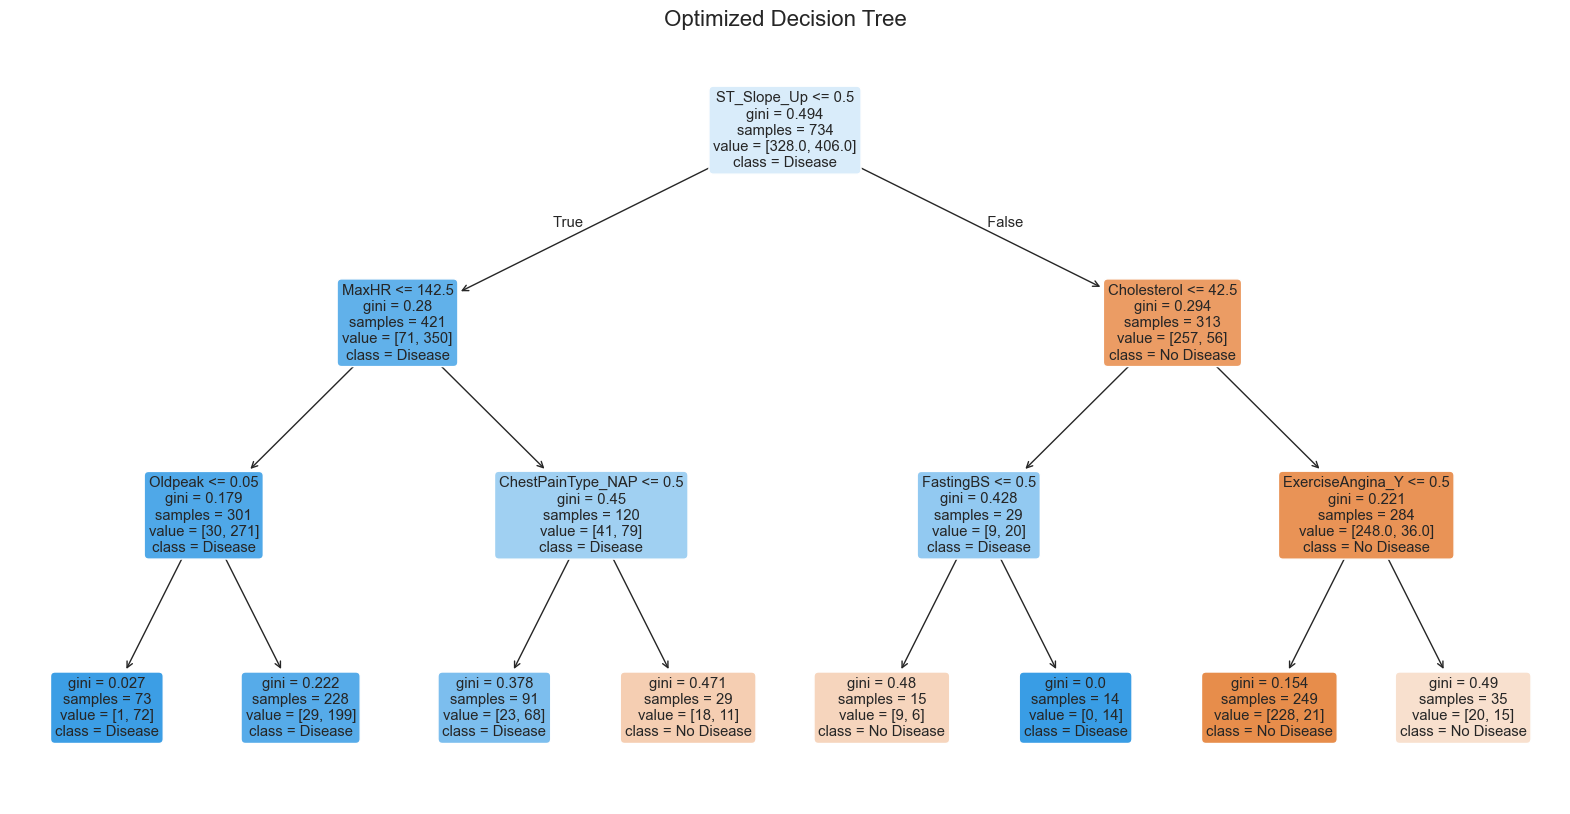

In [74]:
#plotting the final tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#  best model from GridSearch
best_tree = grid.best_estimator_

# Plot the tuned tree
plt.figure(figsize=(20, 10))
plot_tree(best_tree, 
          filled=True, 
          feature_names=X.columns, 
          class_names=["No Disease", "Disease"], 
          rounded=True)
plt.title("Optimized Decision Tree", fontsize=16)
plt.show()


In [ ]:
#built a Decision Tree to predict heart disease.
#At first, the model overfitted — it got 100% accuracy on training data but only about 74% on test data.
#Then i used pre-pruning with GridSearchCV to tune parameters like:
#max_depth min_samples_split min_samples_leaf

#this made the tree simpler and better at generalizing to new data.
#As a result, test accuracy improved, and the tree became easier to understand and faster.
#The most important features for predicting heart disease were:
#MaxHR (maximum heart rate)
#ChestPainType
#ST_Slope

In [75]:
# saving the model
import joblib

# Save the trained model
joblib.dump(clf, 'decision_tree_model.pkl')


['decision_tree_model.pkl']